# Checkpoint 1

### Read This First
**1. Use the constants provided in the cell below. Do not use your own constants.**

**2. Put the code that produces the output for a given task in the specific cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. Additional cells need to be in the proper order such that your code runs the first time through.**

The Coulomb law is given by:

$
\Large
\begin{align}
F(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r^{2}} \left( \frac{r}{r_{0}} \right)^{\alpha},
\end{align}
$

where $r_{0}$ is the Bhor radius, given by:

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

The electric potential is given by:

$
\Large
\begin{align}
V(r) = \int_{r}^{\infty} F(r^{\prime}) dr^{\prime}
\end{align}
$

Use the following constants:
* $\frac{\hbar^{2}}{2m} = 0.0380998\ nm^{2} eV$ (called `c1` below)
* $\frac{e^{2}}{4 \pi \epsilon_{0}} = 1.43996\ nm\ eV$ (called `c2` below)
* $r_{0} = 0.0529177\ nm$ (called `r0` below)
* Planck constant $h = 6.62606896\times10^{-34} J s$ (`h`)
* Speed of light $c = 299792458\ m/s$ (`c`)

In [2]:
# add imports here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad
from scipy.linalg import eigvalsh_tridiagonal
from scipy.stats import linregress

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

In [4]:
# Constants (use these)
c1 = 0.0380998 # nm^2 eV
c2 = 1.43996 # nm eV
r0 = 0.0529177 # nm
h  = 6.62606896e-34 # J s
c  = 299792458. # m/s
hc = 1239.8419 # eV nm

## Task 1

Write a code that calculates $V(r)$ numerically for $\alpha = 0.01$ and plots it for $r$ = 0.01...1 nm. Remember to label the axes.

In [5]:
def get_force(r, alpha=0):
    """
    Method: calculates the electrostatic force between a proton and
    an electron with charge ±e respectively

    :param r:  radial distance
    :param alpha:  perturbation
    :return force: value for force as a float
    """
    force = -c2 * 1 / (r)**2 * (r / r0)**alpha
    return force

def potential_numerical(r, alpha=0):
    """
    Method: calculates the electrostatic potential for a pairwise
    system through the integration of the force between the pair

    :param radii:  numPy array of radial distances
    :param alpha:  perturbation
    :return potential: numPy array of potential values
    """
    potential = quad(get_force, r, np.inf, args=(alpha))[0]
    return potential

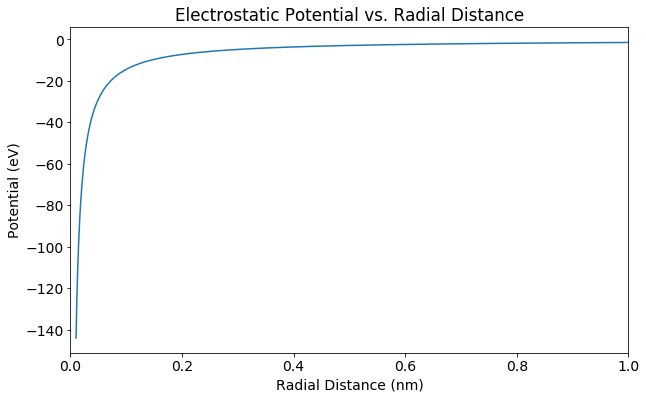

In [34]:
N = 13000  # Number of integration steps
radii = np.linspace(0.01, 1.5, num=N)  # Defining radial distances (rmax = 1.5nm)
# rmax = 1.5nm gets good contribution of the energy from BOTH n=1 and n=2 energy levels
potential = np.array([]) # Forming potential array
for i in range(radii.size):
    potential = np.append(potential, potential_numerical(radii[i], alpha=0)) # Getting potential
    
# Plotting electrostatic potential vs radial distance for H atom
plt.title("Electrostatic Potential vs. Radial Distance")
plt.xlabel("Radial Distance (nm)")
plt.xlim(right=1.0)
plt.ylabel("Potential (eV)")
plt.plot(radii, potential)
plt.show()

## Task 2

In addition to (1), the test below will compare the analytic expression for $𝑉(r)$ with the numerically obtained values for $r$ = 0.01,0.02...1 nm. The biggest absolute difference $diff = max |V_{exact}(r) − V_{numerical}(r)|$ must be smaller than 10$^{−5}$ eV. There is nothing else for you to do.

In [35]:
# We will call your function for one value of r and alpha = 0.01. There will be more tests!
potential_numerical(0.5, 0.01)

-2.975081858428647

## Task 3

In addition to (2), calculate the first 2 energy levels (eigenvalues of $H$) for $\alpha = 0, 0.01$ and print out the values in eV. The values must be accurate to 0.01 eV. This requires sufficiently large $r_{max}$ and $N$. Plot the difference $\Delta E$ between the two energies for $\alpha = 0, 0.01$. Remember to label the axes.

In [36]:
def energy_levels(alpha):
    """
    Method: determines the Hamiltonian using sparse matrices
    where H = -hbar**2/2m * (d/dr)**2 + V(r) 

    :param radii: numPy array of radial distances
    :param dr: step
    :return E1,E2: the two lowest eigenvalues
    """
    # Constructing Hamiltonian
    dr_array = np.arange(dr, radii.size * dr + dr, dr)
    pot_diag = np.array([])
    for i in range(dr_array.size):
        pot_diag = np.append(pot_diag, potential_numerical(dr_array[i], alpha))
    
    H_diag = (- c1 / (dr)**2) * np.full(radii.size, -2) + pot_diag 
    off_diag =(- c1 / (dr)**2)   * np.full(radii.size - 1, 1)
    
    # Finding eigenvalues of tridiagonal Hamiltonian matrix
    eigvals = eigvalsh_tridiagonal(H_diag, off_diag, select='i', select_range=(0,1))
    np.sort(np.real(eigvals))
    E1, E2 = eigvals[0], eigvals[1]
    return E1, E2

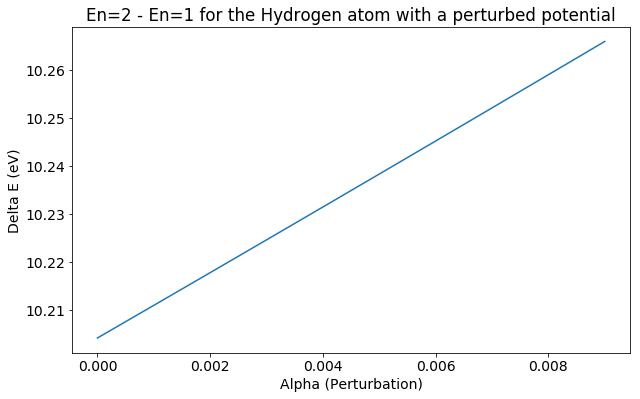

In [37]:
dr = max(radii)/N 
delta_E = np.array([])
alpha_values = np.arange(0.0, 0.01, 0.001)

# Calculating delta E for different alpha values
for alpha in alpha_values:
    E1, E2 = energy_levels(alpha)
    delta_E = np.append(delta_E, E2-E1)
    
# Plotting delta_E vs. alpha   
plt.title("En=2 - En=1 for the Hydrogen atom with a perturbed potential")
plt.xlabel("Alpha (Perturbation)")
plt.ylabel("Delta E (eV)")
plt.plot(alpha_values, delta_E)
plt.show()


In [38]:
# Print out the energy levels for alpha = 0, 0.01.
e_levels_0 = energy_levels(0.0)
e_levels_0_01 = energy_levels(0.01)
print ("alpha = 0.00:", e_levels_0)
print ("alpha = 0.01:", e_levels_0_01)

alpha = 0.00: (-13.605598566607691, -3.401402280845947)
alpha = 0.01: (-13.807382891866881, -3.5346022779978856)


## Task 4

In addition to (3), assuming that the transition between the 1st excited and the ground state corresponds to the wavelength $\lambda = 121.5 \pm 0.1$ nm, what is the maximum value of $\alpha_{max} > 0$ consistent with this measurement (i.e., the largest $\alpha_{max} > 0$ such that the predicted and measured wavelengths differ by less than 0.1 nm)?

In [58]:
def find_alpha_max():
    # Only need delta_E_max to find alpha_max 
    # delta_E max corresponds to minimum wavelength between n=2 and n=1 levels
    lambda_min = 121.4
    delta_E_max = hc / lambda_min

    # Finding equation of line from plot above
    r = linregress(alpha_values, delta_E)
    # Finding corresponding alpha_max to delta_E_max from straight line
    alpha_max = (delta_E_max - r.intercept)/r.slope 
    return alpha_max

In [59]:
# Run the function and print alpha_max.
alpha_max = find_alpha_max()
print ("alpha_max:", alpha_max)

alpha_max: 0.0012803032280778062


## Task 5

Improve the accuracy of the computation of the two energy levels to 0.001 eV and find $\alpha_{max}$ assuming the wavelength $\lambda = 121.503 \pm 0.01$ nm.

In [60]:
### TASK 5
def energy_levels_improved(alpha):
    """
    Method: determines the Hamiltonian using sparse matrices
    where H = -hbar**2/2m * (d/dr)**2 + V(r) 

    :param radii: numPy array of radial distances
    :param dr: step
    :return E1,E2: the two lowest eigenvalues
    """
    dr_array = np.arange(dr, radii.size * dr + dr, dr)
    pot_diag = np.array([])
    for i in range(dr_array.size):
        pot_diag = np.append(pot_diag, potential_numerical(dr_array[i], alpha))
    
    H_diag = (- c1 / (dr)**2) * np.full(radii.size, -2) + pot_diag
    off_diag =(- c1 / (dr)**2)   * np.full(radii.size - 1, 1)

    eigvals = eigvalsh_tridiagonal(H_diag, off_diag, select='i', select_range=(0,1))
    np.sort(np.real(eigvals))
    E1, E2 = eigvals[0], eigvals[1]
    return E1, E2

def find_alpha_max_improved():
    # Only need delta_E_max to find alpha_max 
    # delta_E max corresponds to minimum wavelength between n=2 and n=1 levels
    # Using old accuray of ±0.001nm as I think the code is fast enough
    lambda_min = 121.502
    delta_E_max = hc / lambda_min

    # Finding equation of line from plot above
    r = linregress(alpha_values, delta_E)
    # Finding corresponding alpha_max to delta_E_max from straight line
    alpha_max = (delta_E_max - r.intercept)/r.slope 
    return alpha_max

In [61]:
# Run the function and print alpha_max.
e_levels_0_01 = energy_levels_improved(0.01)
print ("alpha = 0.01:", e_levels_0_01)
# Run the function and print alpha_max.
alpha_max_improved = find_alpha_max_improved()
print ("alpha_max:", alpha_max_improved)

alpha = 0.01: (-13.807382891866881, -3.5346022779978856)
alpha_max: 2.8704299245945143e-05


## Task 6

How would one achieve the same accuracy with significantly smaller matrices? Hint: can we represent $R$ from Eq. (1) as a linear combination of functions that solve the "unperturbed" equation, and translate this into an eigenproblem for a certain $N \times N$ matrix, with $N < 100$?

In [25]:
### TASK 6
def energy_levels_best(alpha):
    # Remove the line that says "raise NotImplementedError"
    # YOUR CODE HERE
    raise NotImplementedError()
    return E1, E2

def find_alpha_max_best():
    # Remove the line that says "raise NotImplementedError"
    # YOUR CODE HERE
    raise NotImplementedError()
    return alpha_max

In [26]:
# Run the function and print alpha_max.
e_levels_0_01 = energy_levels_best(0.01)
print ("alpha = 0.01:", e_levels_0_01)
# Run the function and print alpha_max.
alpha_max_best = find_alpha_max_best()
print ("alpha_max:", alpha_max_best)

NotImplementedError: 